# Solving Iris dataset using K Nearest Neighbour

### Importing Libraries

In [20]:
import csv,matplotlib.pyplot as plt, numpy as np
from sklearn.metrics import r2_score

### Creating class parameters: 
- Class 1: Iris Setosa
- Class 2: Iris-versicolor
- Class 3 : Iris-virginica

In [21]:
x1=[]
y1=[]

x2=[]
y2=[]

x3=[]
y3=[]

dataset = []

### Importing CSV file and populating parameters
Column index 3 refers to "PetalLengthCm" and column index 4 refers to "PetalWidthCm"

In [22]:
with open('Iris.csv') as file:
    a = csv.reader(file)
    for i in a:
        if i[0] != '':
            dataset += [i] ## Accumulating Dataset
        
       
for i in dataset:
    
       ## Populating Class Arrays ##
 
        if i[5] == 'Iris-setosa':
            x1 += [float(i[4])] ## PetalLengthCm
            y1 += [float(i[3])] ## PetalWidthCm
        elif i[5] == 'Iris-versicolor':
            x2 += [float(i[4])]
            y2 += [float(i[3])]
        elif i[5] == 'Iris-virginica':
            x3 += [float(i[4])]
            y3 += [float(i[3])]
                
x1=np.array(x1)
x2=np.array(x2)
x3=np.array(x3)
y1=np.array(y1)
y2=np.array(y2)
y3=np.array(y3)

### Plotting Training Data

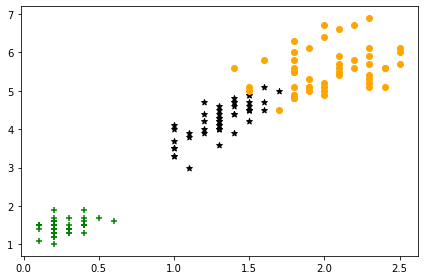

In [23]:
plt.scatter(x1,y1,color='green',marker = '+')
plt.scatter(x2,y2,color='black', marker = '*')
plt.scatter(x3,y3,color='orange')
plt.tight_layout()

## Training

Concatenating all 3 classes to obtain entire training dataset

In [24]:
x = np.concatenate((x1,x2,x3))
y = np.concatenate((y1,y2,y3))

## Testing
### Creating testing parameters

In [25]:
test_predicted=[]
test_check=[]
test_x =[]
test_y = []

for i in dataset:
    if i[0]!="":
        test_x += [float(i[4])]
        test_y += [float(i[3])]
        if i[5]=='Iris-setosa':
            test_check+=[1]
        elif i[5] == 'Iris-versicolor':
            test_check+=[2]
        elif i[5] == 'Iris-virginica':
            test_check+=[3]

test_check = test_check[30:50] + test_check[80:100] + test_check[130:150]
test_x = test_x[30:50] + test_x[80:100] + test_x[130:150]
test_y = test_y[30:50] + test_y[80:100] + test_y[130:150]

### Accumulating predicted results from KNN Classification

In [26]:
for i in range(len(test_x)):
    
    dist=[]

    dist = np.sqrt(np.square(test_x[i]-x)+np.square(test_y[i]-y))

    xi=[]
    yi=[]

    sorted_dist = np.sort(dist,axis=None)

    # k = int(input('Enter K: '))
    k = 3
    count=0

    while count<=k:
        index = np.where(dist==sorted_dist[count])
        if len(index[0])!=1:
            for i in index:
                for j in i:
                    xi  += [x[j]]
                    yi  += [y[j]]
                    count+=1
        else:
            xi  += [x[index]]
            yi  += [y[index]]
            count+=1
    
    c1,c2,c3=0,0,0

    for i in range(k):
        if xi[i] in x1 and yi[i] in y1:
            c1+=1
        elif xi[i] in x2 and yi[i] in y2:
            c2+=1
        elif xi[i] in x3 and yi[i] in y3:
            c3+=1
            
    c = max(c1,c2,c3)

    if c==c1: test_predicted+=[1]
    elif c==c2: test_predicted+=[2]
    elif c==c3: test_predicted+=[3]

## Checking Accuracy and R_2 Score

In [27]:
accuracy = 0
for i in range(60):
    if test_predicted[i]==test_check[i]:
        accuracy+=1
    
accuracy = (accuracy/len(test_x))*100

print('R2 Score:',r2_score(test_check,test_predicted),'\nAccuracy:',accuracy)

R2 Score: 0.95 
Accuracy: 96.66666666666667
